In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import time

def checkTime(func):
    
    def newFunc(*args,**kwargs):
        start = time.time()
        func(*args,**kwargs)
        end = time.time()
        print("\n총 실행시간은 {}초 입니다. ".format(end - start))
        
    return newFunc

warnings.filterwarnings(action='ignore')

df = pd.read_csv('K_DRAMA_NFO_202109.csv', index_col=0, parse_dates = True)

df1 = df.drop(['BRDCST_END_DE','PROGRM_END_TIME','PROGRM_DC','PROGRM_BRDCST_AREA_NM','PROGRM_GENRE_LCLAS_NM',
               'PROGRM_GENRE_MLSFC_NM','PROGRM_GENRE_SCLAS_NM','CST_CN'],axis=1)

df11 = df1.loc[(df1['CHNNEL_NM']=='JTBC')
              |(df1['CHNNEL_NM']=='KBS1')
              |(df1['CHNNEL_NM']=='MBC')
              |(df1['CHNNEL_NM']=='SBS')
              |(df1['CHNNEL_NM']=='tvN')]

df11.head()

,CHNNEL_NM,PROGRM_BEGIN_TIME,PROGRM_NM,BRDCST_TME_NM,BRDCST_TIME,MALE_4_9YO_WTCHNG_RT,MALE_N10S_WTCHNG_RT,MALE_N20S_WTCHNG_RT,MALE_N30S_WTCHNG_RT,MALE_N40S_WTCHNG_RT,MALE_N50S_WTCHNG_RT,MALE_N60S_ABOVE_WTCHNG_RT,FEMALE_4_9YO_WTCHNG_RT,FEMALE_N10S_WTCHNG_RT,FEMALE_N20S_WTCHNG_RT,FEMALE_N30S_WTCHNG_RT,FEMALE_N40S_WTCHNG_RT,FEMALE_N50S_WTCHNG_RT,FEMALE_N60S_ABOVE_WTCHNG_RT
BRDCST_DE,,,,,,,,,,,,,,,,,,,
2021-09-01,KBS1,203112,속아도꿈결,98회,2807,1.91121,3.15030,2.09781,3.07116,3.49764,5.78830,17.46663,1.01454,1.30062,1.51997,3.11875,4.55390,12.46363,18.90274
2021-09-01,MBC,85223,두번째남편,16회,2921,0.25966,1.06909,0.32441,0.38374,1.17022,1.58663,1.24675,0.20506,0.83963,0.20008,0.78139,0.97325,1.14983,1.78425
2021-09-01,MBC,190240,두번째남편,17회,2926,0.28723,0.76320,0.31510,1.94320,2.34736,1.79500,5.27036,0.17365,0.79180,0.41742,1.87828,1.31816,4.54236,5.83274
2021-09-01,SBS,124042,홍천기,2회,11150,0.94897,0.18164,0.20663,0.54833,1.43833,0.96496,0.83260,0.14105,0.27994,0.18484,0.39075,0.76853,0.95263,1.45086
2021-09-01,tvN,20000,빈센조,3회,4537,0.00000,0.00000,0.00000,0.23451,0.61305,0.00000,0.45459,0.00000,0.00000,0.00000,0.38065,0.00291,0.02888,0.33026


In [2]:
lst = []
for i in df11['PROGRM_NM']:
    if i in lst:
        continue
    lst.append(i)

viewer = ['MALE_4_9YO_WTCHNG_RT','MALE_N10S_WTCHNG_RT','MALE_N20S_WTCHNG_RT','MALE_N30S_WTCHNG_RT','MALE_N40S_WTCHNG_RT',
         'MALE_N50S_WTCHNG_RT','MALE_N60S_ABOVE_WTCHNG_RT',
         'FEMALE_4_9YO_WTCHNG_RT','FEMALE_N10S_WTCHNG_RT','FEMALE_N20S_WTCHNG_RT','FEMALE_N30S_WTCHNG_RT','FEMALE_N40S_WTCHNG_RT',
         'FEMALE_N50S_WTCHNG_RT','FEMALE_N60S_ABOVE_WTCHNG_RT']

<속아도꿈결> <두번째남편> <홍천기> <빈센조> <갯마을차차차> <더로드1의비극> <펜트하우스3> <이벤트를확인하세요> <인간실격> <슬기로운의사생활시즌2> <하이클래스> <검은태양> <원더우먼> <유미의세포들> <홈타운> 

다음 중 정보를 알고 싶은 드라마의 이름을 입력하세요 : 홍천기


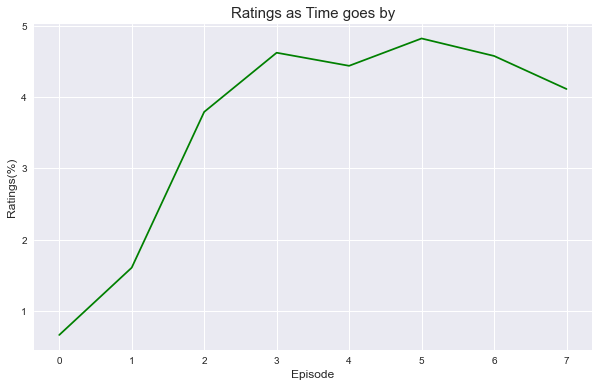


총 실행시간은 6.192589998245239초 입니다. 


In [3]:
def input_drama():
    for i in lst:
        print("<{}>".format(i),end=" ")
    print("\n")
    drama=input("다음 중 정보를 알고 싶은 드라마의 이름을 입력하세요 : ")
    
    return drama

class PerEpisode:
    def __init__(self,name):
        self.name = name
        
    def timegb(self):
        df_=df11.loc[df11['PROGRM_NM']==self.name].dropna()
        epi=[]
        epipr=[]
        
        for a in df_['BRDCST_TME_NM']:
            if a not in epi:
                epi.append(a)
            
        for j in range(len(epi)):
            epipr.append(0)
        
        for i in range(len(epi)):
            for k in range(len(viewer)):
                epipr[i] +=float(df_.loc[df_['BRDCST_TME_NM']==epi[i],viewer[k]][0])
            epipr[i]=epipr[i]/len(viewer)
            
        return epipr
        
@checkTime
def main():
    name = PerEpisode(input_drama())
    epipr = name.timegb()

    plt.style.use('seaborn')
    plt.figure(figsize=(10,6))
    
    plt.plot(epipr,color="g")
    plt.xlabel('Episode',size=12)
    plt.ylabel('Ratings(%)',size=12)
    plt.title('Ratings as Time goes by',size=15)

    plt.show(block=False)

main()

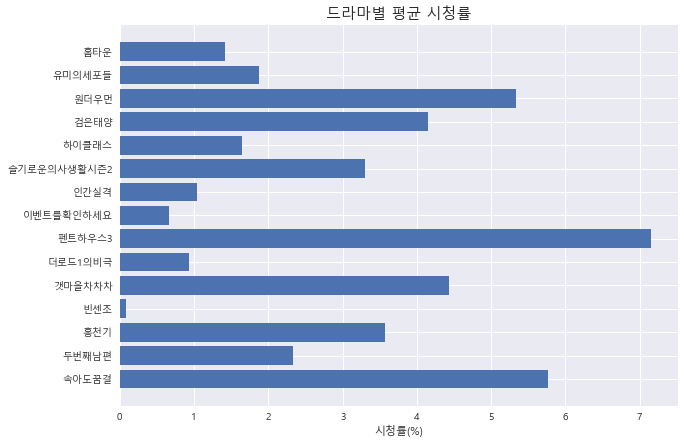


총 실행시간은 0.5824761390686035초 입니다. 


In [5]:
class Program:#회차별평균을 내서 시청자군별 시청률 구하기
    def __init__(self,name):
        self.name = name #프로그램 제목
        self.ratings = [0,0,0,0,0,0,0,
                       0,0,0,0,0,0,0]
    
    def ratings(self,value):
        self.ratings = value

        
    def indrama(self):
        df_=df11.loc[df11['PROGRM_NM']==self.name].dropna()
        epi = []
        
        for a in df_['BRDCST_TME_NM']:
            if a not in epi:
                epi.append(a)
                for i in range(len(viewer)):
                    self.ratings[i]+=float(df_.loc[df_['BRDCST_TME_NM']==a,viewer[i]][0])
            else:
                continue
                
        
        for rt in range(len(self.ratings)):
            self.ratings[rt]=self.ratings[rt]/len(epi)
                
        return self.ratings

def merge_data():
    drama1 = Program(lst[0])
    drama2 = Program(lst[1])
    drama3 = Program(lst[2])
    drama4 = Program(lst[3])
    drama5 = Program(lst[4])
    drama6 = Program(lst[5])
    drama7 = Program(lst[6])
    drama8 = Program(lst[7])
    drama9 = Program(lst[8])
    drama10 = Program(lst[9])
    drama11 = Program(lst[10])
    drama12 = Program(lst[11])
    drama13 = Program(lst[12])
    drama14 = Program(lst[13])
    drama15 = Program(lst[14])
    
    col = ['m4','m10','m20','m30','m40','m50','m60','f4','f10','f20','f30','f40','f50','f60']
    con = [drama1.indrama(),drama2.indrama(),drama3.indrama(),drama4.indrama(),drama5.indrama(),drama6.indrama(),drama7.indrama(),
           drama8.indrama(),drama9.indrama(),drama10.indrama(),drama11.indrama(),drama12.indrama(),
           drama13.indrama(),drama14.indrama(),drama15.indrama()]

    daf=pd.DataFrame(con, columns = col,index = lst)
    avg = daf.sum(axis=1)/14
    daf['mean']=avg   
    return daf

@checkTime
def mainfunc():
    daf = merge_data()
    
    plt.figure(figsize=(10,7))
    plt.barh(lst,daf['mean'])
    plt.title("드라마별 평균 시청률",size=15)
    plt.xlabel('시청률(%)')
    plt.yticks(fontsize=10)
    plt.rc('font',family='Malgun Gothic')
    
    
    plt.show()
    

mainfunc()

In [7]:
class InputException(Exception):
    def __init__(self,msg):
        self.message = msg
        
def input_sex():
    sex = input("성별을 입력해주세요(남/여): ")
    
    if ((sex!='남') and (sex!='여')):
        raise InputException("잘못된 입력입니다.")
    else:
        return sex
    
def input_age():
    age = int(input("나이를 입력해주세요: "))
    if (age<0):
        raise InputException("잘못된 입력입니다.")
    else:
        return age

@checkTime
def recommend():
    daf = merge_data()
    largest = 0
    flag = False
    
    while(not flag):
        try:
            sex = input_sex()
        
        except InputException as e:
            print(e.args[0])
        
        else:
            if sex == "여":
                who = 'f'
            elif sex=="남":
                who = 'm'
            
            try:
                age=input_age()
            
            except ValueError:
                print("잘못된 입력입니다.")
            except InputException as e:
                print(e.args[0])
            else:
                if age<=9:
                    who+='4'
                elif 10<=age<=19:
                    who+='10'
                elif 20<=age<=29:
                    who+='20'
                elif 30<=age<=39:
                    who+='30'
                elif 40<=age<=49:
                    who+='40'
                elif 50<=age<=59:
                    who+='50'
                else:
                    who+='60'
                flag=True
                
                for i in range(len(daf[who])):
                    if largest<daf[who][i]:
                        largest = daf[who][i]
                        indd = i
                print("당신과 비슷한 성별과 연령대의 사람들이 선호하는 드라마는 <{}> 입니다.".format(lst[indd]))
                
recommend()

성별을 입력해주세요(남/여): 남
나이를 입력해주세요: 49
당신과 비슷한 성별과 연령대의 사람들이 선호하는 드라마는 <검은태양> 입니다.

총 실행시간은 6.692904710769653초 입니다. 
